# Step 1 - Problem Definition   <!-- Largest -->

## Research Problem

**Focus Question:**  
“How do horsepower and weight relate to vehicle price?”

This is a **regression problem**, as the goal is to predict a continuous outcome (car price) based on explanatory variables (*horsepower* and *weight*).

---

### Stakeholders
- **Car buyers** → identify which technical specifications (engine power and weight) justify higher prices.  
- **Dealerships and resellers** → price cars more competitively by understanding which attributes contribute most to value.  
- **Manufacturers** → gain insights into how design features (engine size, build weight) impact consumer willingness to pay.  
- **Car racers and enthusiasts** → understand how weight influences horsepower and overall performance, helping evaluate cars not just for price, but also for speed, efficiency, and racing potential.  

---

### Expected Outcome
By solving this problem, we uncover the **key performance and design factors** that drive car prices.  
This enhances transparency in the car market and provides **decision support** for buyers, sellers, and manufacturers alike, making it a practically valuable and persuasive study.


# Step 2 - Data Description <!-- Largest -->

### Loading the auto_price.csv dataset into a pandas DataFrame for cleaning and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
df = pd.read_csv("auto_price.csv")

### Displaying the first few rows of the dataset with all columns visible for inspection.

In [2]:
pd.set_option("display.max_columns",None)
df.head()

,Unnamed: 0,Make_Model,Body_Type,Price,Vat,Mileage,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Age,Previous_Owners,Horsepower,Inspection_New,Paint_Type,Upholstery_Type,Gearing_Type,Displacement,Weight,Drive_Chain,Cons_Comb
0,0,Audi A1,Sedans,$15770.0,NaN,34804.85 mi,Used,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...",NaN,NaN,NaN,3.0,NaN,66.0 kW,1.0,NaN,NaN,Automatic,1422.0 cc,1220.0 kg,front,NaN
1,1,Audi A1,Sedans,NaN,NaN,80000.0 km,NaN,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...",NaN,"Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0 kW,0.0,NaN,NaN,Automatic,NaN,2766.80 lbs,front,5.6
2,2,Audi A1,Sedans,$14640.0,NaN,51853.41 mi,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...",NaN,"Alloy wheels,Voice Control",NaN,3.0,NaN,85.0 kW,0.0,NaN,NaN,Automatic,NaN,2502.24 lbs,NaN,NaN
3,3,Audi A1,NaN,NaN,NaN,45360.08 mi,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...",NaN,NaN,NaN,3.0,1.0,66.0 kW,0.0,Metallic,NaN,Automatic,NaN,1195.0 kg,NaN,3.8
4,4,Audi A1,Sedans,$16790.0,NaN,16200.0 km,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",NaN,NaN,3.0,NaN,66.0 kW,NaN,NaN,NaN,Automatic,NaN,1135.0 kg,NaN,4.1


### Dataset Dimensions

In [3]:
rows,cols = df.shape
print(f"Number of rows in auto_price dataset: {rows} rows")
print(f"Number of columns in auto_price dataset: {cols} columns")

Number of rows in auto_price dataset: 18286 rows
Number of columns in auto_price dataset: 24 columns


### Dataset Information - Data Types, Non-Null Summary, Missing Values (%) & Unique Data per Column.

In [4]:
def getinfo(data):
    info_df = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.astype(str),
        "Non Null Count": df.count().values,
        "Null Data Count": df.isnull().sum().values,
        "Missing %": (df.isnull().sum().values / len(df) * 100),
        "Unique Data Count": df.nunique(dropna=True).values #excluding Nan values
    })
    return info_df
info_df = getinfo(df)
info_df

,Column,Data Type,Non Null Count,Null Data Count,Missing %,Unique Data Count
Unnamed: 0,Unnamed: 0,int64,18286,0,0.000000,18286
Make_Model,Make_Model,object,16092,2194,11.998250,9
Body_Type,Body_Type,object,16092,2194,11.998250,8
Price,Price,object,14995,3291,17.997375,4541
Vat,Vat,object,11886,6400,34.999453,2
Mileage,Mileage,object,16641,1645,8.995953,7507
Type,Type,object,14446,3840,20.999672,5
Fuel,Fuel,object,11155,7131,38.997047,4
Gears,Gears,float64,13166,5120,27.999563,4
Comfort_Convenience,Comfort_Convenience,object,14081,4205,22.995734,5289


### Numerical vs Categorical Features

In [5]:
def find_datatypes(data):
    num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    str_cols = data.select_dtypes(include=['object']).columns.tolist()
    return str_cols,num_cols
str_cols, num_cols = find_datatypes(df)
print("Object Data Type Columns:", str_cols)
print("Numerical Data Type Columns:", num_cols)

Object Data Type Columns: ['Make_Model', 'Body_Type', 'Price', 'Vat', 'Mileage', 'Type', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Horsepower', 'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement', 'Weight', 'Drive_Chain']
Numerical Data Type Columns: ['Unnamed: 0', 'Gears', 'Age', 'Previous_Owners', 'Inspection_New', 'Cons_Comb']


### Unique Count & Values in Categorical Columns

In [6]:
for col in str_cols:
    print(f"{col} Unique Value Count: {df[col].nunique()}")
    print(f"{col} Unique Values: {df[col].unique()}")

Make_Model Unique Value Count: 9
Make_Model Unique Values: ['Audi A1' nan 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa'
 'Opel Insignia' 'Renault Clio' 'Renault Duster' 'Renault Espace']
Body_Type Unique Value Count: 8
Body_Type Unique Values: ['Sedans' nan 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road'
 'Convertible' 'Transporter']
Price Unique Value Count: 4541
Price Unique Values: ['$15770.0' nan '$14640.0' ... '€10178.85' '$31700.0' '£8097.50']
Vat Unique Value Count: 2
Vat Unique Values: [nan 'VAT deductible' 'Price negotiable']
Mileage Unique Value Count: 7507
Mileage Unique Values: ['34804.85 mi' '80000.0 km' '51853.41 mi' ... '39230.88 mi' '58482.82 mi'
 '10870.0 km']
Type Unique Value Count: 5
Type Unique Values: ['Used' nan "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel Unique Value Count: 4
Fuel Unique Values: [nan 'Benzine' 'Diesel' 'LPG/CNG' 'Electric']
Comfort_Convenience Unique Value Count: 5289
Comfort_Convenience Unique Values: ['Air conditioning,Arm

### Visualization of Missing Values (%) per Column(Bar chart)

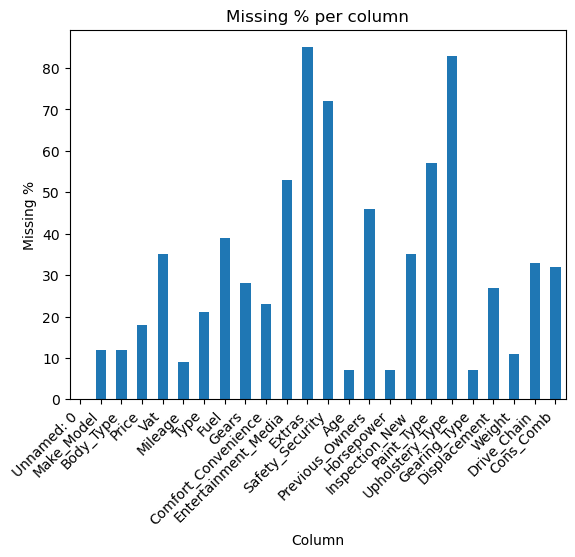

In [7]:
if not info_df.empty:
    info_df.set_index("Column")["Missing %"].plot.bar()
    plt.ylabel("Missing %")
    plt.title("Missing % per column")
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Visualization of Distribution of Data Types(Bar Chart)

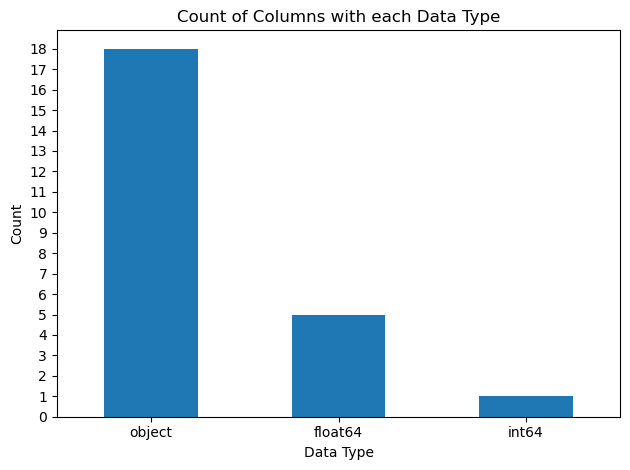

In [8]:
if not info_df.empty:
    info_df["Data Type"].value_counts().plot.bar()
    plt.ylabel("Count")
    plt.title("Count of Columns with each Data Type")
    plt.xticks(rotation=0)
    plt.yticks(range(0, info_df["Data Type"].value_counts().max() + 1)) 
    plt.tight_layout()
    plt.show()

# Step 3 - Data Cleaning and Processing <!-- LARGEST -->

### Droping Unnecessary/Unnamed Column

In [9]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Make_Model,Body_Type,Price,Vat,Mileage,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Age,Previous_Owners,Horsepower,Inspection_New,Paint_Type,Upholstery_Type,Gearing_Type,Displacement,Weight,Drive_Chain,Cons_Comb
0,Audi A1,Sedans,$15770.0,NaN,34804.85 mi,Used,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...",NaN,NaN,NaN,3.0,NaN,66.0 kW,1.0,NaN,NaN,Automatic,1422.0 cc,1220.0 kg,front,NaN
1,Audi A1,Sedans,NaN,NaN,80000.0 km,NaN,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...",NaN,"Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0 kW,0.0,NaN,NaN,Automatic,NaN,2766.80 lbs,front,5.6
2,Audi A1,Sedans,$14640.0,NaN,51853.41 mi,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...",NaN,"Alloy wheels,Voice Control",NaN,3.0,NaN,85.0 kW,0.0,NaN,NaN,Automatic,NaN,2502.24 lbs,NaN,NaN
3,Audi A1,NaN,NaN,NaN,45360.08 mi,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...",NaN,NaN,NaN,3.0,1.0,66.0 kW,0.0,Metallic,NaN,Automatic,NaN,1195.0 kg,NaN,3.8
4,Audi A1,Sedans,$16790.0,NaN,16200.0 km,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",NaN,NaN,3.0,NaN,66.0 kW,NaN,NaN,NaN,Automatic,NaN,1135.0 kg,NaN,4.1


### Removing Duplicate Rows

In [10]:
original_dataset = df.shape[0]
df.drop_duplicates(inplace = True)
dupdroped_dataset = df.shape[0]
no_of_dup_rows = original_dataset - dupdroped_dataset
print("dropped",no_of_dup_rows,"duplicate rows from the dataset")

dropped 0 duplicate rows from the dataset


### Detecting Units in Key Columns(Needed for standardization)

In [11]:
research_columns = ['Horsepower','Displacement','Weight','Cons_Comb','Price','Mileage']

In [12]:
def record_units(data):
    string = data.astype(str).str.lower().str.strip()
    pattern = pattern = pattern = r'[^0-9,./-]+'
    all_units = []
    for text in string.dropna():
        units = re.findall(pattern, text)
        for token in units:
            token = token.strip()
            if token:
                all_units.append(token)
    return pd.Series(all_units).value_counts()

In [13]:
def find_units(targets):
    for col in targets:
        if col in df.columns:
            print(f"\ncolumn details of '{col}'")
            unit_counts = record_units(df[col])
            print(unit_counts)
        else:
            print(f"Column '{col}' not found in DataFrame.")

In [14]:
find_units(research_columns)


column details of 'Horsepower'
kw     17006
nan     1280
Name: count, dtype: int64

column details of 'Displacement'
cc     13349
nan     4937
Name: count, dtype: int64

column details of 'Weight'
kg     9097
lbs    4829
g      2349
nan    2011
Name: count, dtype: int64

column details of 'Cons_Comb'
nan    5851
Name: count, dtype: int64

column details of 'Price'
$      8111
€      4806
nan    3291
£      2078
Name: count, dtype: int64

column details of 'Mileage'
km     8828
mi     7813
nan    1645
Name: count, dtype: int64


### `convert_data()` – Function Description  

The `convert_data()` function is designed to standardize the columns in the dataset by:  

- **Removing unwanted text/units** such as symbols or formatting characters.  
- **Converting values** into a consistent numerical format for analysis.  
- **Handling invalid entries** by replacing negative or non-numeric values with `NaN`.  

In [15]:
def convert_data(data, mapping_values):
    data = data.astype(str).str.strip().str.lower()
    result = []
    for d in data:
        modified_value = None
        for cur_symbol, multiplier in mapping_values.items():
            if cur_symbol in d:
                try:
                    modified_value = float(d.replace(cur_symbol, "").replace(",", "")) * multiplier
                except:
                    modified_value = np.nan
                break  
        if modified_value is None:
            try:
                modified_value = float(d.replace(",", ""))
            except:
                modified_value = np.nan
        if modified_value is not None and modified_value < 0:
            modified_value = np.nan
        result.append(modified_value)
    return pd.Series(result, index=data.index)

##### Standardizing Price

In [16]:
currency_rates = {"€": 1.10, "£": 1.30, "$": 1.0}
df["Price"] = convert_data(df["Price"], currency_rates)
df.loc[df["Price"] < 0, "Price"] = np.nan
df["Price"] = df["Price"].round(2)
df["Price"]

0        15770.0
1            NaN
2        14640.0
3            NaN
4        16790.0
          ...   
18281    12490.0
18282        NaN
18283    16990.0
18284        NaN
18285        NaN
Name: Price, Length: 18286, dtype: float64

##### Standardizing Mileage

In [17]:
Mileage_rates = {"km": 1, "mi": 1.60}
df["Mileage"] = convert_data(df["Mileage"], Mileage_rates)
df.loc[df["Mileage"] < 0, "Mileage"] = np.nan
df["Mileage"] = df["Mileage"].round(2)
df["Mileage"]

0        55687.76
1        80000.00
2        82965.46
3        72576.13
4        16200.00
           ...   
18281    87850.00
18282    62769.41
18283    29545.44
18284    93572.51
18285    10870.00
Name: Mileage, Length: 18286, dtype: float64

##### Standardizing Weight

In [18]:
weight_rates = {"kg": 1, "lbs": 0.453, "g": 0.001}
df["Weight"] = convert_data(df["Weight"], weight_rates)
df.loc[df["Weight"] < 0, "Weight"] = np.nan
df["Weight"] = df["Weight"].round(2)
df["Weight"]

0        1220.00
1        1253.36
2        1133.51
3        1195.00
4        1135.00
          ...   
18281    1360.00
18282        NaN
18283    1250.00
18284    2316.97
18285    1133.51
Name: Weight, Length: 18286, dtype: float64

##### Standardizing Displacement

In [19]:
Displacement_rates = {"cc": 1}
df["Displacement"] = convert_data(df["Displacement"], Displacement_rates)
df.loc[df["Displacement"] < 0, "Displacement"] = np.nan
df["Displacement"] = df["Displacement"]
df["Displacement"]

0        1422.0
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
18281       NaN
18282     999.0
18283    1598.0
18284    1956.0
18285     999.0
Name: Displacement, Length: 18286, dtype: float64

##### Standardizing Horsepower

In [20]:
Horsepower_rates = {"kw": 1}
df["Horsepower"] = convert_data(df["Horsepower"], Horsepower_rates)
df.loc[df["Horsepower"] < 0, "Horsepower"] = np.nan
df["Horsepower"] = df["Horsepower"]
df["Horsepower"]

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
18281     81.0
18282     70.0
18283     81.0
18284    125.0
18285      NaN
Name: Horsepower, Length: 18286, dtype: float64

In [21]:
df["Cons_Comb"] # kept for analysis, No unit conversion.

0        NaN
1        5.6
2        NaN
3        3.8
4        4.1
        ... 
18281    NaN
18282    4.4
18283    3.9
18284    5.6
18285    4.3
Name: Cons_Comb, Length: 18286, dtype: float64

In [22]:
percentage_missing_values = df.isnull().mean() * 100
for d in df.columns:
    if percentage_missing_values[d] > 50:
        df.drop(columns=[d], inplace=True)

### Ploting boxplots of all numerical columns to visually detect outliers

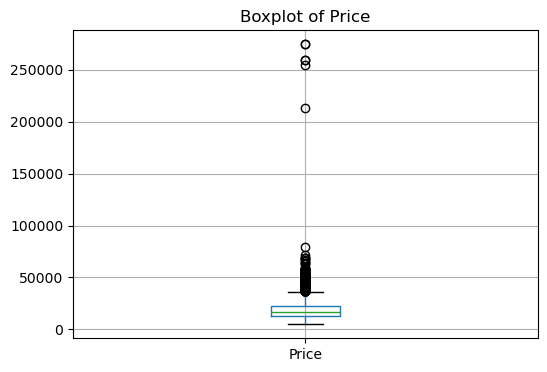

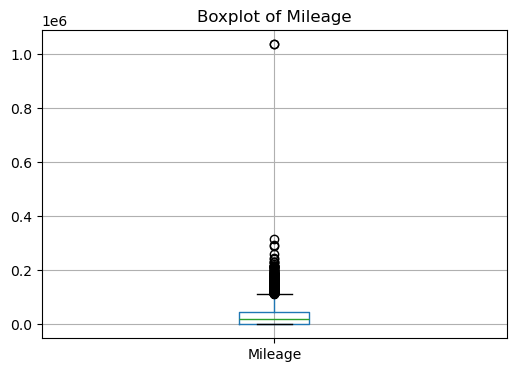

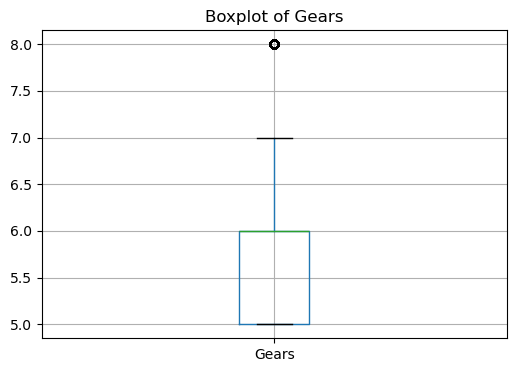

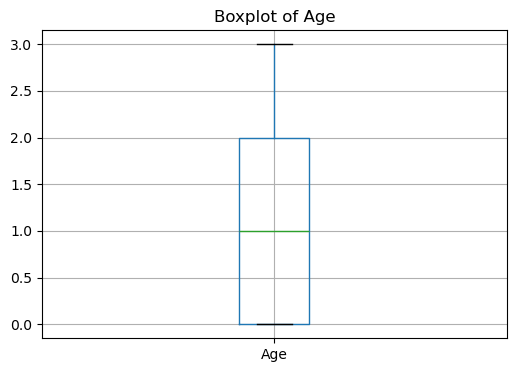

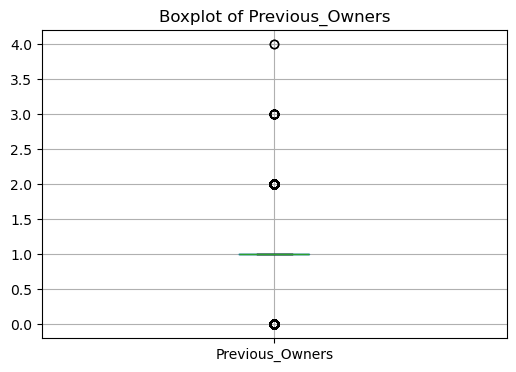

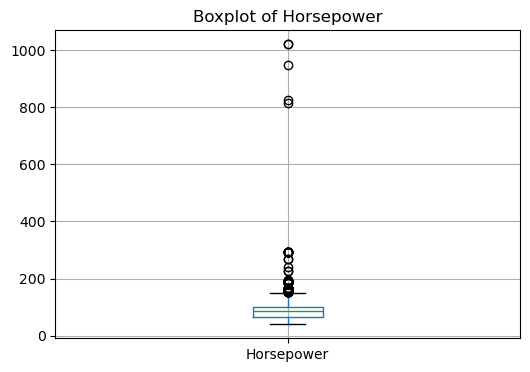

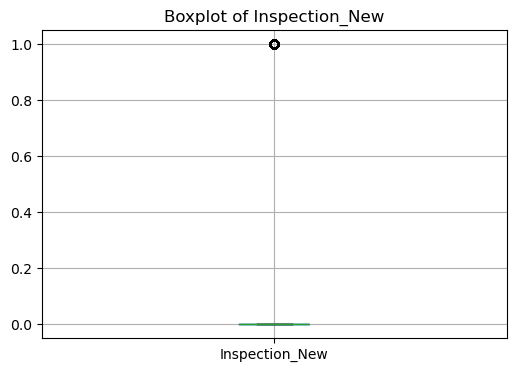

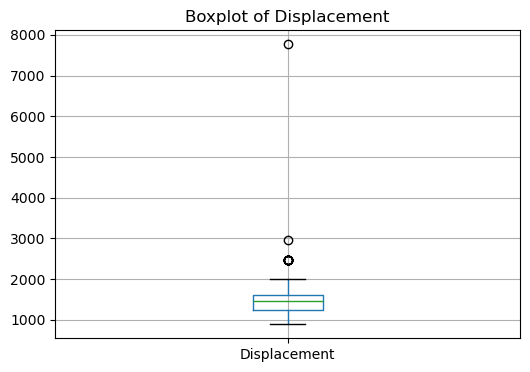

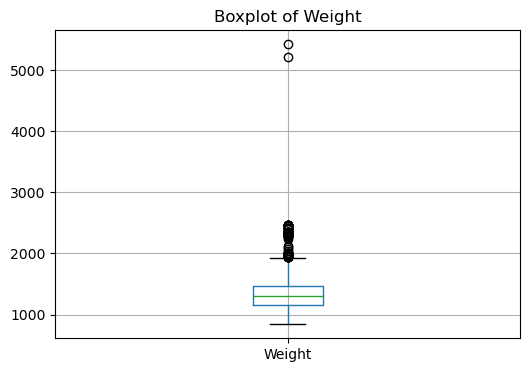

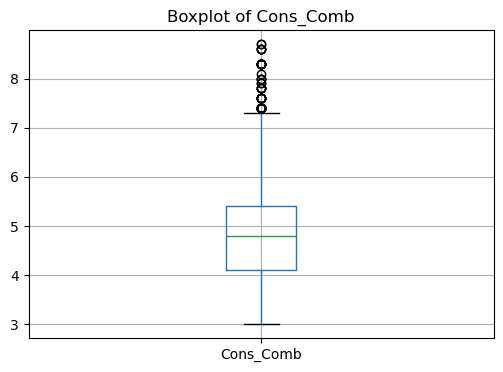

In [23]:
str_cols,num_cols = find_datatypes(df) 
for col in num_cols:
    plt.figure(figsize=(6, 4))
    df[[col]].boxplot()  
    plt.title(f"Boxplot of {col}")
    plt.show()

### Calculating skewness of each numerical column to assess data distribution shape.

In [24]:
for column in df.columns:
    if column in num_cols:
        print(column,df[column].skew())

Price 8.534358642607158
Mileage 3.5768033063767612
Gears 0.326869897463697
Age 0.18360837743472722
Previous_Owners 1.211625005987488
Horsepower 7.3004259463025605
Inspection_New 1.166549949712611
Displacement 0.7524583494423647
Weight 1.9357647334575978
Cons_Comb 0.4365821407758584


### Plots histograms of numerical columns before cleaning to visualize distributions and skewness.

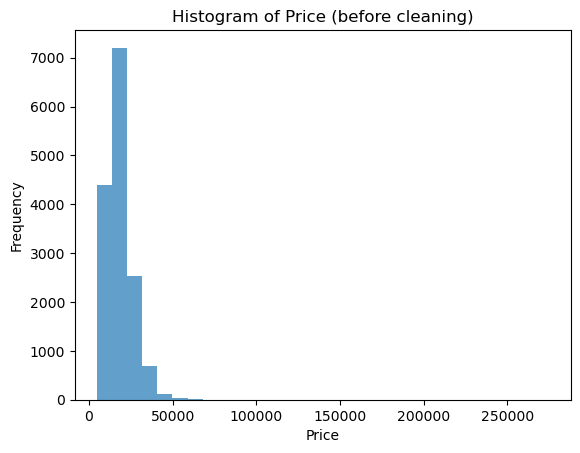

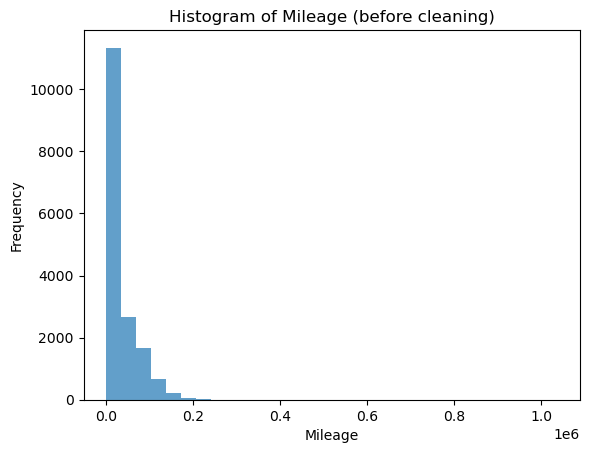

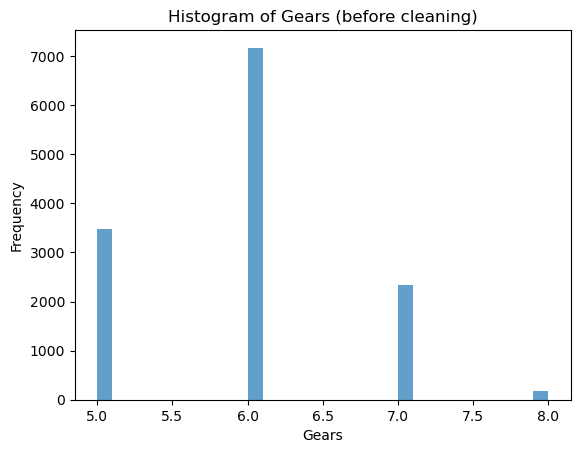

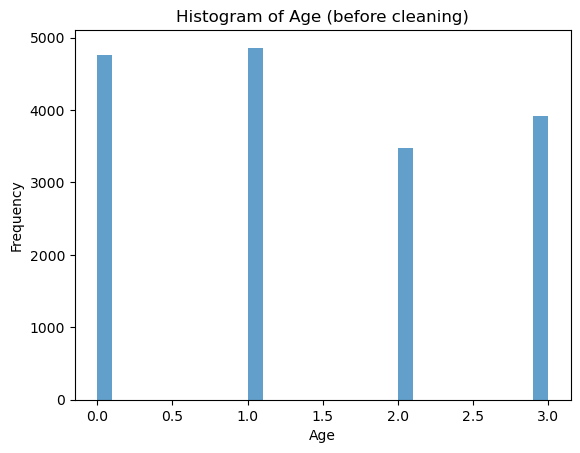

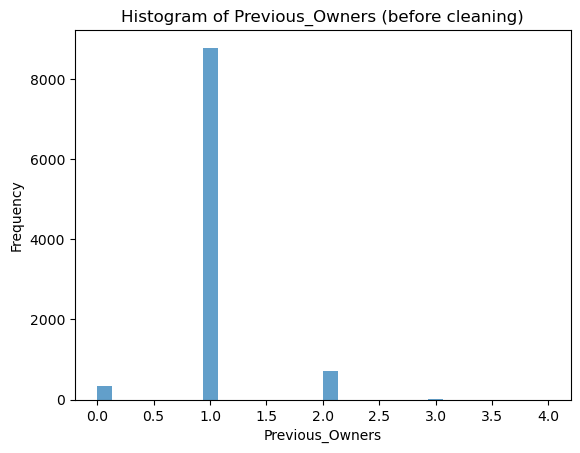

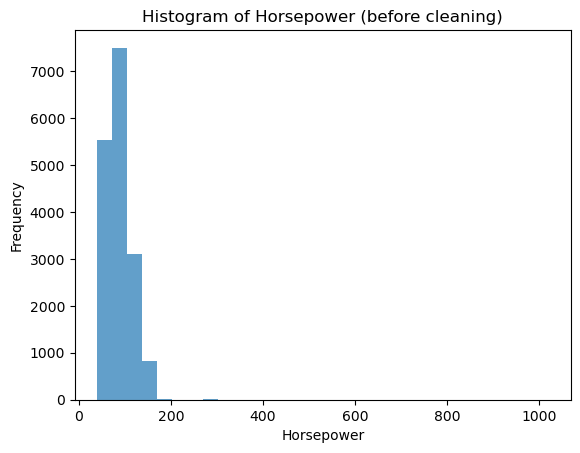

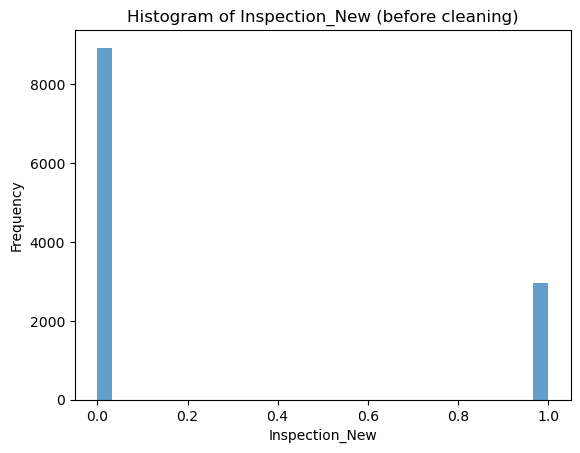

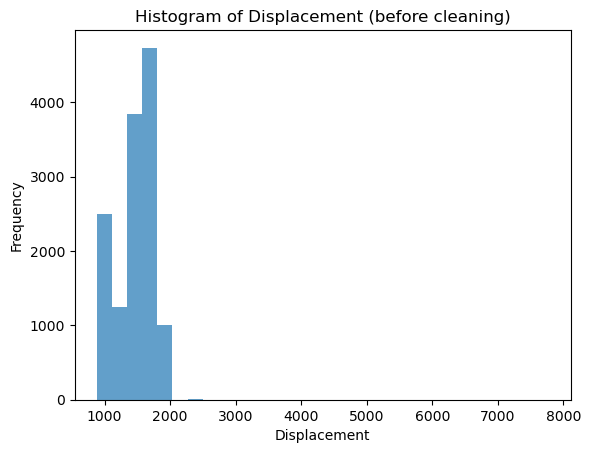

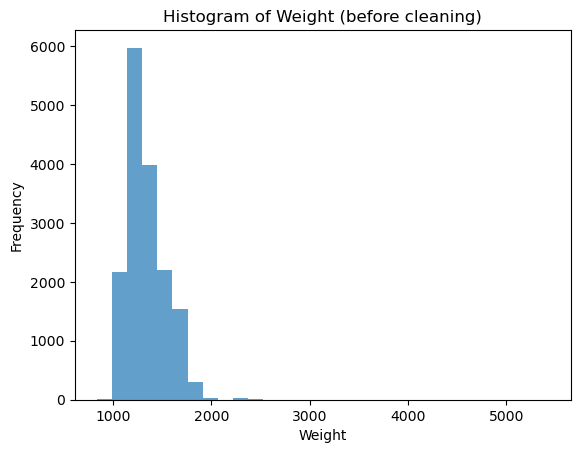

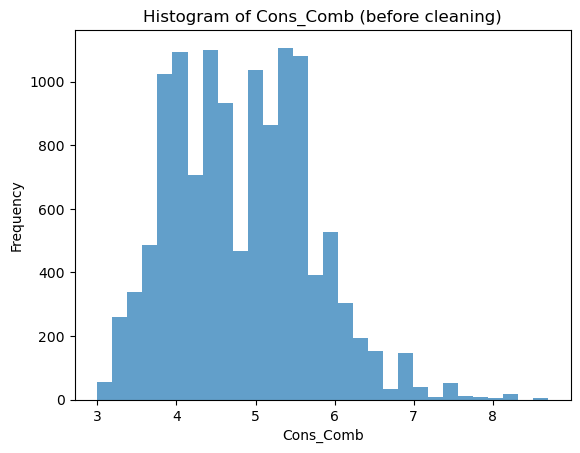

In [25]:
import matplotlib.pyplot as plt
for col in num_cols:
    df[col].plot.hist(bins=30, alpha=0.7)
    plt.title(f'Histogram of {col} (before cleaning)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Removing extreme outliers.

On analysing the distribution of data in box plot visuals, removing all outliers will result in more data loss.So we are removing only the extreme outliers from Mileage, Price, Horsepower, Weight.

In [27]:
print("Before removing outliers",df.shape)
df = df[df["Mileage"] < 1000000]
df = df[df["Price"] < 200000]
df = df[df["Horsepower"] < 1100]
df = df[df["Weight"] < 5000]
print("After removing outliers",df.shape)

Before removing outliers (18286, 18)
After removing outliers (11289, 18)


### Detecting outliers in numeric columns using the IQR method and replaces them with the median value.

In [28]:
def outlier_detector(df, column):
    series = df[column]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (series < lower_bound) | (series > upper_bound)
    median_value = round(series.median(), 2)
    df.loc[outlier_mask, column] = median_value   
    return outlier_mask, lower_bound, upper_bound

for col in num_cols:
    outlier_mask, lower_bound, upper_bound = outlier_detector(df, col)
    print(f"Count of outliers in {col}: {outlier_mask.sum()}")
    print(f"Lower bound for {col}: {lower_bound}, Upper bound: {upper_bound}\n")
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

Count of outliers in Price: 294
Lower bound for Price: -1125.0, Upper bound: 36483.0

Count of outliers in Mileage: 531
Lower bound for Mileage: -63950.07000000001, Upper bound: 110976.41

Count of outliers in Gears: 117
Lower bound for Gears: 3.5, Upper bound: 7.5

Count of outliers in Age: 0
Lower bound for Age: -3.0, Upper bound: 5.0

Count of outliers in Previous_Owners: 670
Lower bound for Previous_Owners: 1.0, Upper bound: 1.0

Count of outliers in Horsepower: 296
Lower bound for Horsepower: 13.5, Upper bound: 153.5

Count of outliers in Inspection_New: 1808
Lower bound for Inspection_New: 0.0, Upper bound: 0.0

Count of outliers in Displacement: 8
Lower bound for Displacement: 675.5, Upper bound: 2151.5

Count of outliers in Weight: 58
Lower bound for Weight: 703.5800000000002, Upper bound: 1929.9799999999998

Count of outliers in Cons_Comb: 63
Lower bound for Cons_Comb: 2.1499999999999986, Upper bound: 7.350000000000001



### Printing the count of missing values in each column.

In [29]:
print(df.isnull().sum())

Make_Model             1363
Body_Type              1338
Price                     0
Vat                    3917
Mileage                   0
Type                   2377
Fuel                   4456
Gears                  3129
Comfort_Convenience    2561
Age                     786
Previous_Owners        5232
Horsepower                0
Inspection_New         4010
Gearing_Type            786
Displacement           3073
Weight                    0
Drive_Chain            3742
Cons_Comb              3614
dtype: int64


### Defining imputation rules (mean/median/mode) for each column and fills missing values accordingly, ensuring dataset completeness.

In [30]:
strategy = {
    "Price": "median",
    "Mileage": "median",
    "Gears": "median",
    "Age": "median",
    "Previous_Owners": "median",
    "Horsepower": "median",
    "Inspection_New": "median",
    "Displacement": "median",
    "Weight": "median",
    "Cons_Comb": "median"
}

def replacing_nan_with_median_or_mode(data):
    percentage_missing_values = data.isnull().mean() * 100
    str_cols = data.select_dtypes(include=["object"]).columns
    num_cols = data.select_dtypes(include=[np.number]).columns

    for d in data.columns:
        if d in str_cols:
            data[d] = data[d].fillna(data[d].mode()[0])
                #data[d] = data[d].fillna("Unknown")
        else:
            if d in strategy:
                method = strategy[d]
                if method == "median":
                    value_median = round(data[d].median(), 2)
                    data[d] = data[d].fillna(value_median).astype(float)
                elif method == "mean":
                    value_mean = round(data[d].mean(), 2)
                    data[d] = data[d].fillna(value_mean).astype(float)
                elif method == "mode":
                    value_mode = round(data[d].mode()[0], 2)
                    data[d] = data[d].fillna(value_mode).astype(float)
                    
    return data

df = replacing_nan_with_median_or_mode(df)

### Reploting boxplots after outlier treatment to confirm reduced extreme values.

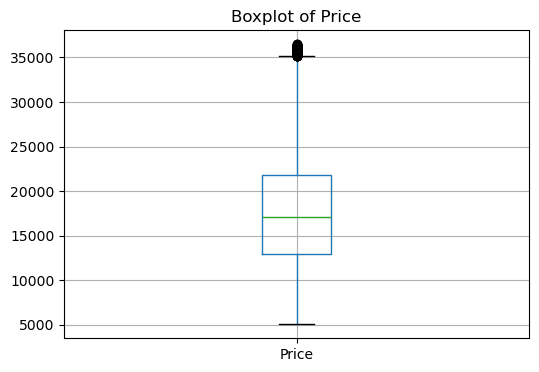

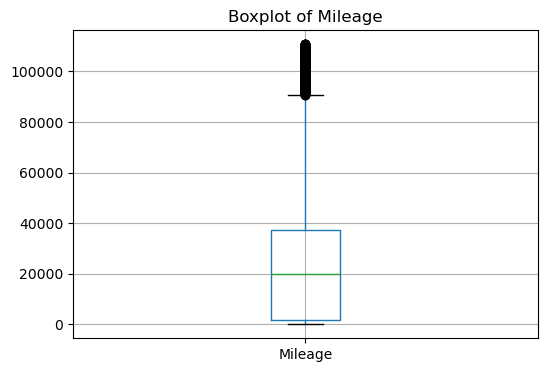

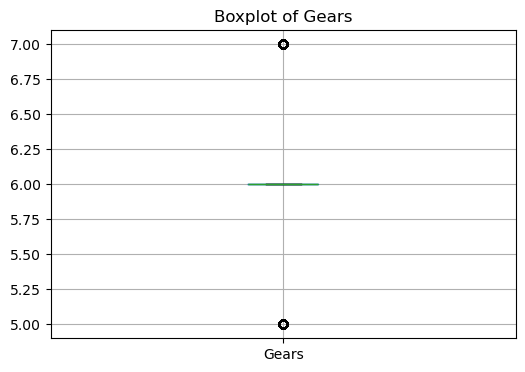

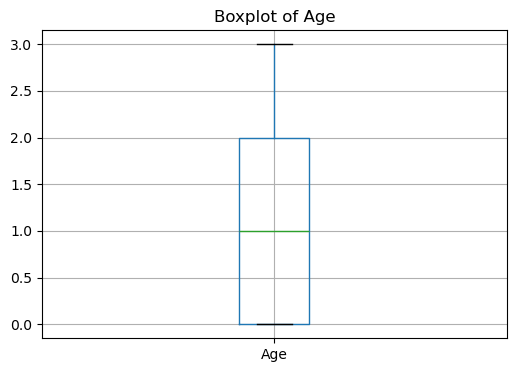

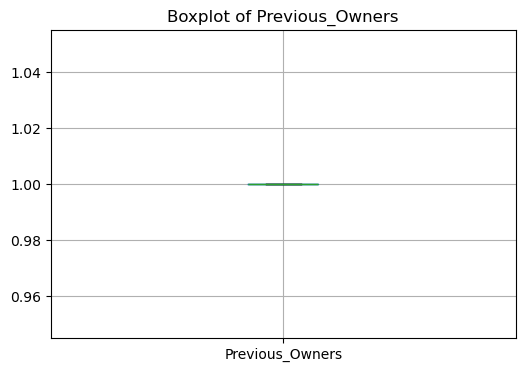

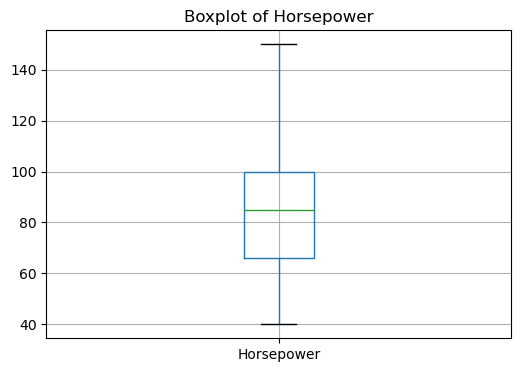

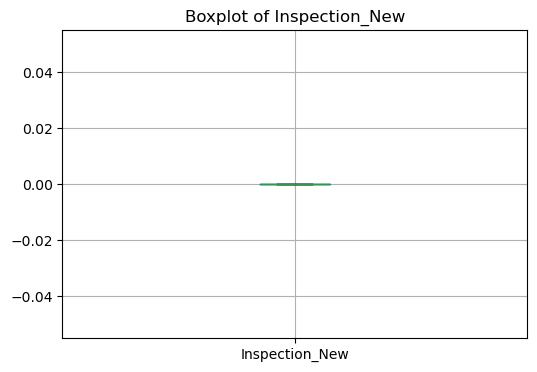

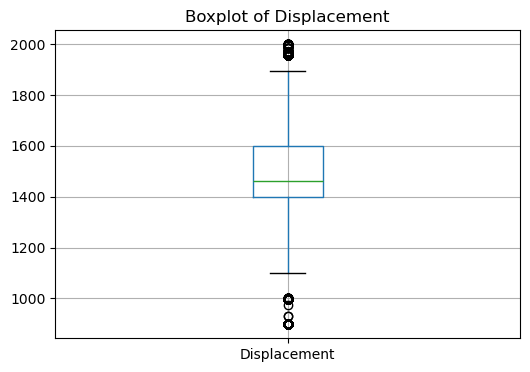

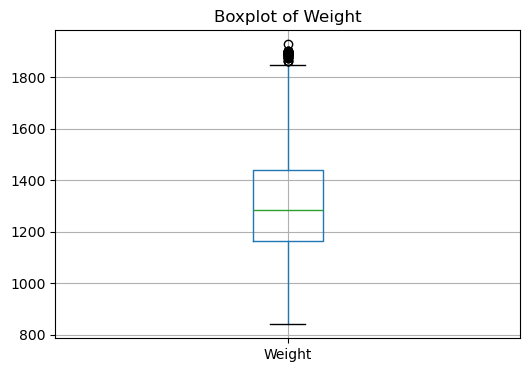

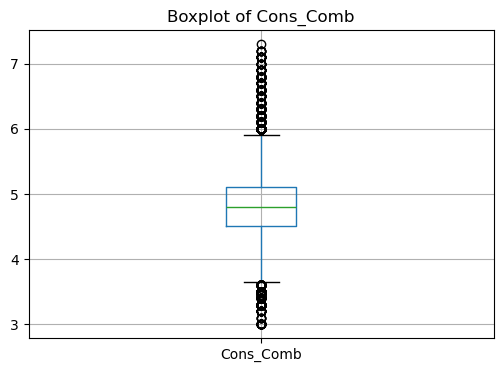

In [31]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    df[[col]].boxplot()  # or df[col].plot.box()
    plt.title(f"Boxplot of {col}")
    plt.show()

### Printing skewness of numerical columns after cleaning to evaluate improvement in data distribution.

In [32]:
for column in df.columns:
    if column in num_cols:
        print(column,df[column].skew())

Price 0.5380324732336953
Mileage 1.2233729792881243
Gears -0.015979909834433356
Age 0.2755813841973632
Previous_Owners 0.0
Horsepower 0.5555663859926778
Inspection_New 0.0
Displacement -0.2914869613452833
Weight 0.7964427479149763
Cons_Comb 0.28844794398566853


### Ploting histograms of numerical columns after cleaning to compare distributions and skewness.

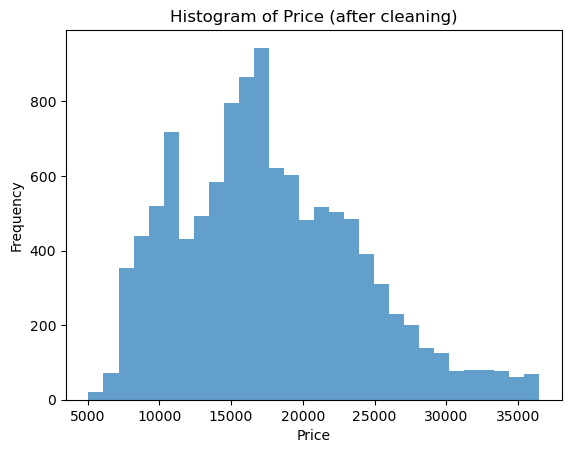

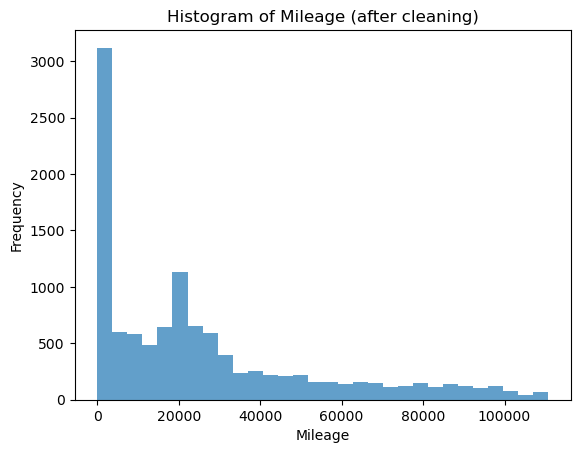

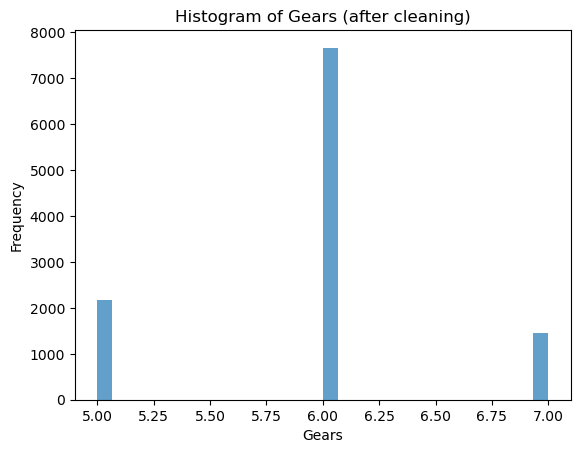

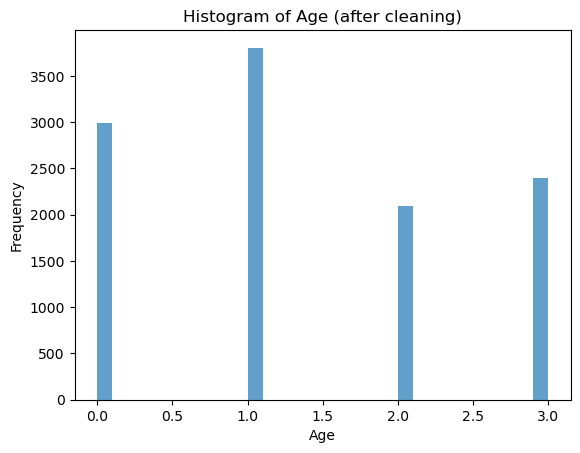

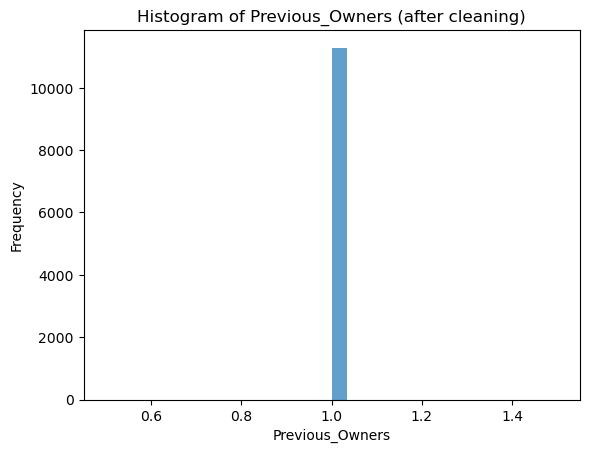

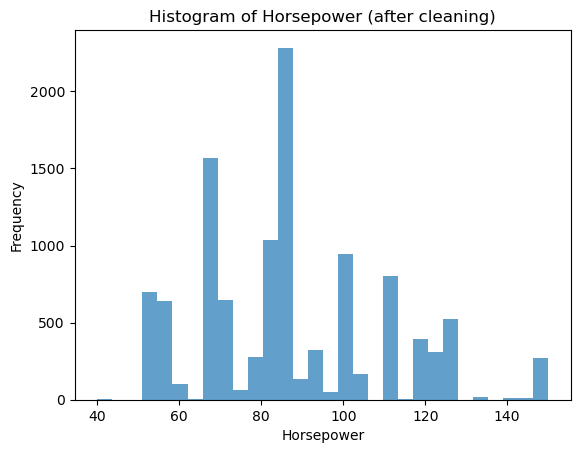

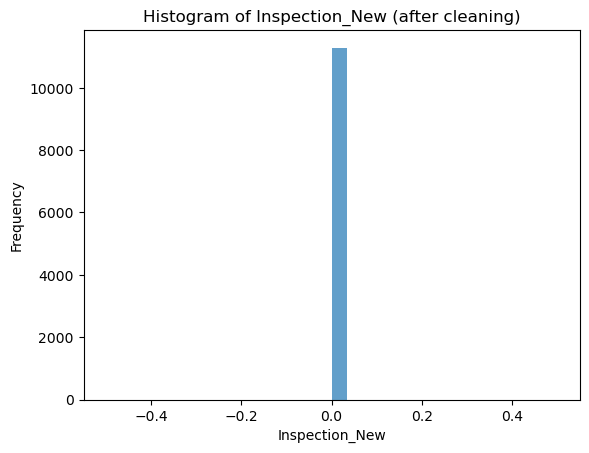

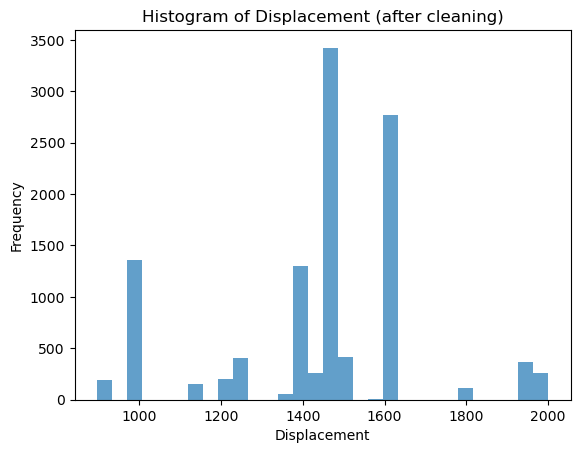

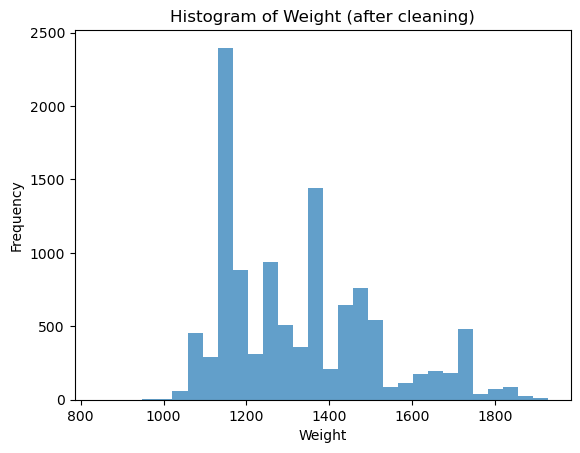

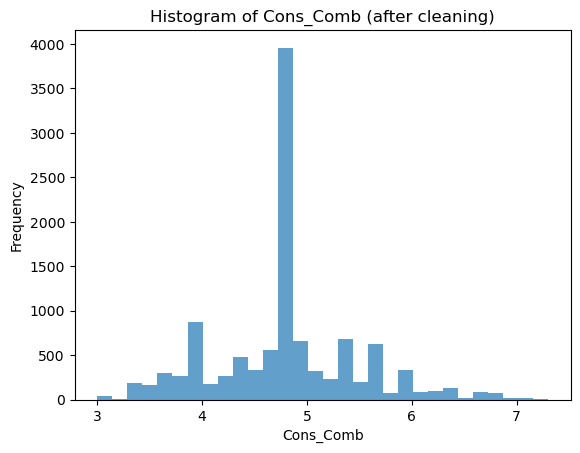

In [33]:
import matplotlib.pyplot as plt
for col in num_cols:
    df[col].plot.hist(bins=30, alpha=0.7)
    plt.title(f'Histogram of {col} (after cleaning)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Strandadizing Categorical columns

In [34]:
"""cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()"""

'cat_cols = df.select_dtypes(include=["object"]).columns\n\nfor col in cat_cols:\n    df[col] = df[col].astype(str).str.strip().str.title()'

##### checking the datatypes after standardization.

In [35]:
str_cols,num_cols = find_datatypes(df) 
print("Object Data Type Columns:", str_cols)
print("Numerical Data Type Columns:", num_cols)

Object Data Type Columns: ['Make_Model', 'Body_Type', 'Vat', 'Type', 'Fuel', 'Comfort_Convenience', 'Gearing_Type', 'Drive_Chain']
Numerical Data Type Columns: ['Price', 'Mileage', 'Gears', 'Age', 'Previous_Owners', 'Horsepower', 'Inspection_New', 'Displacement', 'Weight', 'Cons_Comb']


### Displaying dataset summary after cleaning, showing columns, non-null counts, and data types.

In [36]:
print(df.isnull().sum())
df.info()

Make_Model             0
Body_Type              0
Price                  0
Vat                    0
Mileage                0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Age                    0
Previous_Owners        0
Horsepower             0
Inspection_New         0
Gearing_Type           0
Displacement           0
Weight                 0
Drive_Chain            0
Cons_Comb              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 11289 entries, 0 to 18283
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make_Model           11289 non-null  object 
 1   Body_Type            11289 non-null  object 
 2   Price                11289 non-null  float64
 3   Vat                  11289 non-null  object 
 4   Mileage              11289 non-null  float64
 5   Type                 11289 non-null  object 
 6   Fuel                 11289 n

### Saving the cleaned dataset as auto_price_cleaned.csv in the Downloads folder.

In [37]:
df.to_csv("auto_price_cleaned.csv", index=False)

# Step 4 - Exploratory Data Analysis     <!-- Largest -->

## Correlation Matrix (Overall Insights)

The correlation matrix reveals several key relationships within the dataset:

- **Price** shows strong positive correlation with *Horsepower*, *Gears*, and *Weight*, and a negative correlation with *Age*, confirming that newer, more powerful cars with advanced features are valued higher.
- **Engine-related features** (*Horsepower*, *Displacement*, *Weight*) are interrelated, reflecting natural dependencies in vehicle design.
- **Fuel consumption (Cons_Comb)** shows weak correlations with most features, suggesting it has less direct impact on pricing in this dataset.

**Overall:** The dataset shows logical and interpretable relationships between price, performance, and age, validating its suitability for regression analysis.


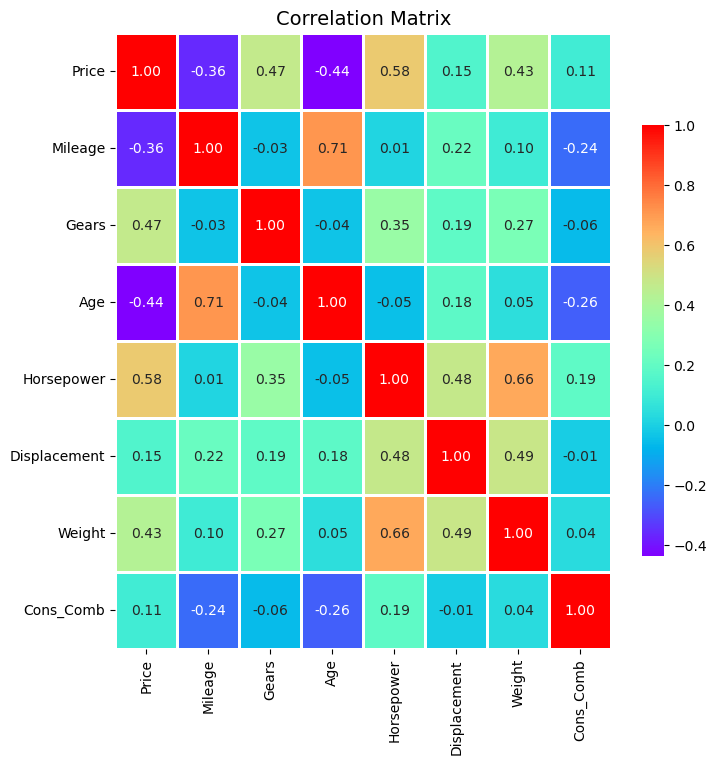

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['Price', 'Mileage', 'Gears', 'Age', 'Horsepower', 'Displacement', 'Weight', 'Cons_Comb']
corr_matrix = df[num_features].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap="rainbow", fmt=".2f", linewidths=2, cbar_kws={"shrink": 0.7})
plt.title("Correlation Matrix", fontsize=14)
plt.show()


## Scatterplots (Numerical Features vs Price)

- **Price vs Horsepower:** Clear positive trend → cars with higher horsepower tend to have higher prices.  
- **Price vs Weight:** Positive relationship → heavier cars are generally more expensive, likely due to larger size and added features.  

 **Insight:** These plots reinforce the dataset’s logic — performance and build size are strong price drivers.


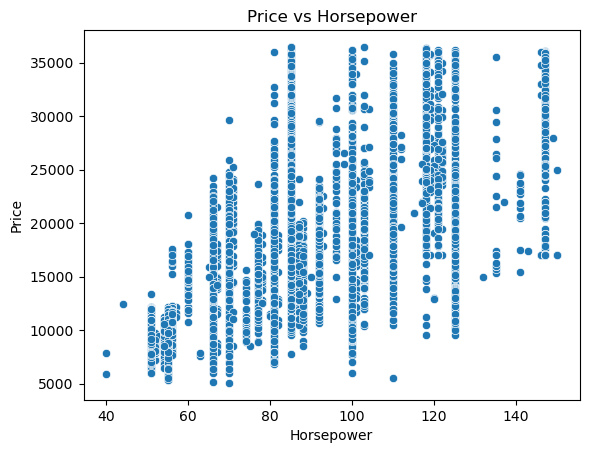

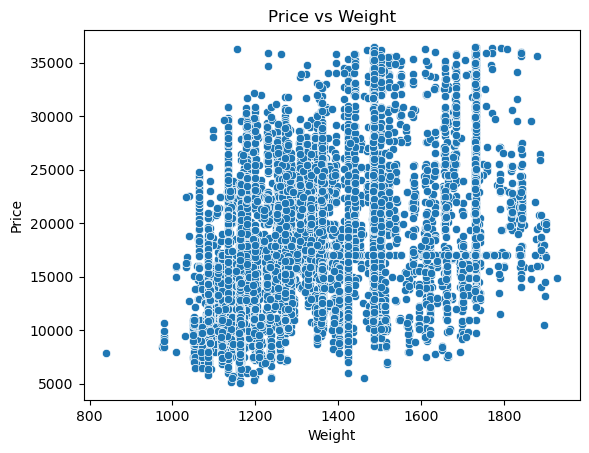

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Horsepower", y="Price", data=df)
plt.title("Price vs Horsepower")
plt.show()

sns.scatterplot(x="Weight", y="Price", data=df)
plt.title("Price vs Weight")
plt.show()


## Bar Plots (Categorical Features vs Price)

- **Median Price by Fuel Type:** Cars running on different fuel types show clear price variation, with some fuel categories commanding higher resale values.  
- **Median Price of Top 10 Car Makes:** Certain brands (top 10 makes) consistently have higher median prices, highlighting the effect of brand reputation on car value.  

**Insight:** Beyond engine performance and age, fuel type and brand identity are important categorical drivers of price.


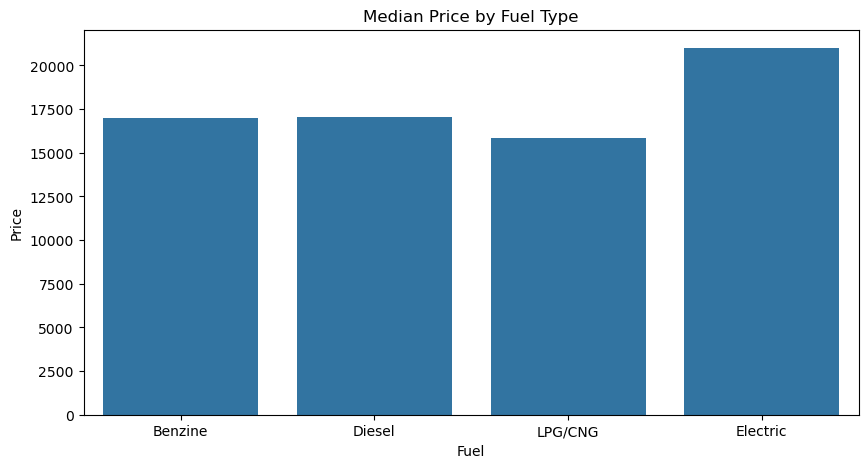

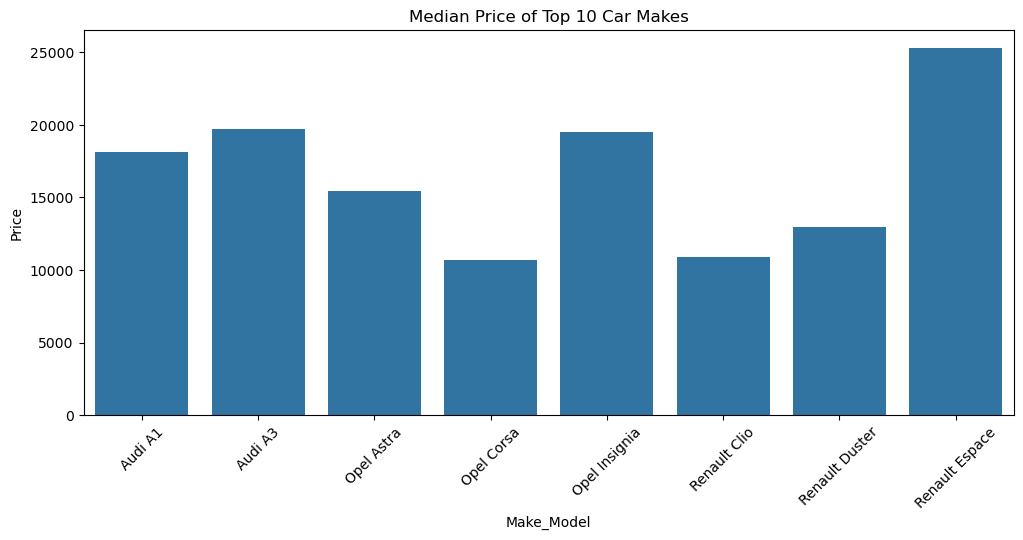

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x="Fuel", y="Price", data=df, estimator="median",errorbar=None)
plt.title("Median Price by Fuel Type")
plt.show()

plt.figure(figsize=(12,5))
top_makes = df["Make_Model"].value_counts().head(10).index
sns.barplot(x="Make_Model", y="Price", data=df[df["Make_Model"].isin(top_makes)],estimator="median",errorbar=None)
plt.title("Median Price of Top 10 Car Makes")
plt.xticks(rotation=45)
plt.show()